### Recurrent Neural Networks

In RNN, the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements. RNN has internal memory and hidden layers which have temporal loop. Thus, it enables them to be very precise in predicting what's coming next, and it is preferred algorithm for sequential data like time series, speech, text, financial data, audio, video because they can perform a much deeper understanding of a sequence.
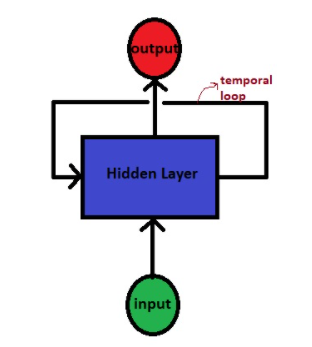

   ### ~ Many to One
In many-to-one sequence problems, we have a sequence of data as input and we have to predict a single output. Text classification is a prime example of many-to-one sequence problems where we have an input sequence of words and we want to predict a single output tag.
   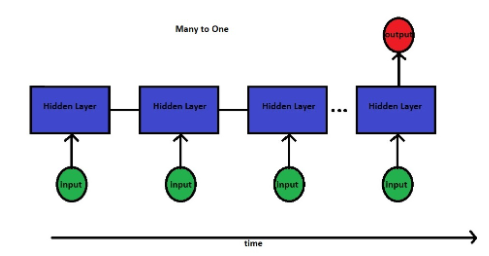

Loading Data
The data contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re

# Keeping texts and sentiments 
data = pd.read_csv('tweets.csv')
data = {'text':data.iloc[:, 5], 'target':data.iloc[:, 0]}
data = pd.DataFrame(data)

# Dropping neutral sentiments
data = data[data.target != 2]

# Cleaning data
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['target'] == 4].size)
print(data[ data['target'] == 0].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
# Converting texts into sequences to deal with them as input
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

RNN- LSTM Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196

# Generating model
model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
from sklearn.model_selection import train_test_split

# Generating train and test data sets
Y = pd.get_dummies(data['target']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.01, random_state = 42)

# Training model
batch_size = 32
model.fit(X_train, Y_train, epochs = 3, batch_size=batch_size, verbose = 2)

In [ ]:
# Measuring score and accuracy
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_validate, Y_validate, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

Testing - Predicting the sentiment of a tweet with the trained model

In [ ]:
import numpy as np

twt = ['People are dying in Palestine.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=40, dtype='int32', value=0)
print(twt)
target = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(target) == 0):
    print("negative")
elif (np.argmax(target) == 4):
    print("positive")

   ### ~ Many to Many
Many-to-many sequence problems involve a sequence input and a sequence output. Chatbots are an example of many-to-many sequence problems where a text sequence is an input and another text sequence is the output. Another example is tranlating sentences to other languages.
   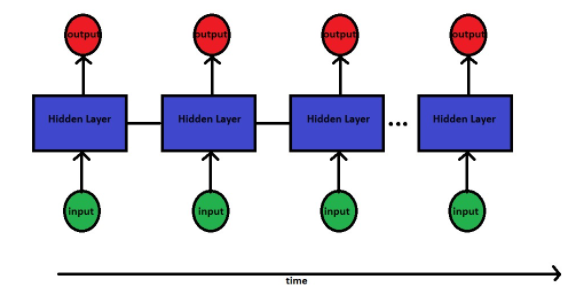

   ### ~ One to Many
In one-to-many sequence problems, we have single input and a sequence of outputs. A typical example is an image and its corresponding description.
   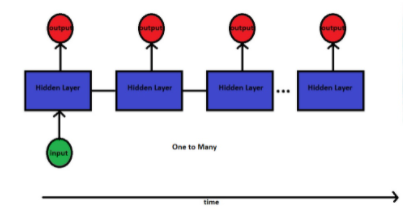